# BDPP Course lab 1

Welcome to the first lab of BDPP course!

This notebook guides you through the basic concepts to start working with Spark, including how to set up your environment, create and analyze data sets, work with data files, and write Spark code.

## About Spark
Spark is a fast and general-purpose cluster computing system. It provides high-level APIs in Java, Scala, Python and R, and an optimized engine that supports general execution graphs. It also supports a rich set of higher-level tools including Spark SQL for processing structured data, MLlib for machine learning, GraphX for graph processing, and Spark Streaming.

<img src='files/spark.png' width="50%" height="50%"></img>


A Spark program has a driver program and worker programs. Worker programs run on cluster nodes or in local threads. Data sets are distributed across workers. 

<img src='files/Spark Architecture.png' width="50%" height="50%"></img>

<a id="sparkinstallation"></a>
## 1. Three methods of running Spark

The first step is to get familiar with different ways of accessing the Spark programming environment. In this lab, we introduce you three methods to do so (two of them run on your local computer, and the other one uses the IBM cloud platform). You are required to run this notebook on your local computer. Alternatively, The cloud platform can be utilized for the cases where you want to scale up your process.

<a id="sparkinstallation1"></a>


### 1.1 Set up a local environment

This notebook uses pySpark, the Python API for Spark. You should follow the following steps to install PySpark locally:
- Install Python
- Install Java
- Download Spark
- Install pyspark

#### Install Python

We use **Python** as the programming language, **Anaconda** as the virtual environment and package manager, and finally **Jupyter notebook** as the development environment. If you haven't installed Python yet, we recommend you to install it through [Anaconda](https://anaconda.org/). Note that this lab is not intended to teach python programming. So, it is recommended to have some python programming background.

Please follow these steps to prepare the development environment:
- Download Anaconda (Python 3.7 version) from https://www.anaconda.com/distribution/, and install it on your machine.
- Create an environment with Python 3.7 and use `pp_course` as the environment name. You can find information about creating and managing anaconda environments using navigator interface from https://docs.anaconda.com/anaconda/navigator/tutorials/manage-environments/#creating-a-new-environment. You can also do it through shell commands https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html. Here is a list of useful commands:
    - `conda create -n pp_course python=3.7`
    - `conda env list`
    - `source activate pp_course` for unix/mac, and `conda activate pp_course` for windows
- Jupyter editor should be installed on your environment by default. If it is not, use Anaconda navigator to install it. To do so, first, go to the Home tab, then select pp_course environment. Finally, from the list of applications, find Jupyter Notebook, and install it. 
- Now you should be able to launch Jupyter. This launches a new browser window (or a new tab) showing the notebook Dashboard, a sort of control panel that allows (among other things) to select which notebook to open. You can also launch Jupyter using shell command. To do so, first, activate `pp_course` environment, then run the following command: `jupyter notebook`
- Play with the interface and try to figure out its functionalities. You can find lots of useful information about notebook from the following [link](https://buildmedia.readthedocs.org/media/pdf/jupyter-notebook/latest/jupyter-notebook.pdf).

#### Install Java

You need Java installed on your machine since Spark runs on top of JVM. Download and install Java SDK 8. You can download it from the following link:
http://www.oracle.com/technetwork/pt/java/javase/downloads/jdk8-downloads-2133151.html

Add `JAVA_HOME` environment variable to your system (**Note:** This step depends on your operating system.):
- on Unix/mac: `export JAVA_HOME="/path/to/the/java/folder"`
- on Windows see this [link](https://confluence.atlassian.com/doc/setting-the-java_home-variable-in-windows-8895.html)

#### Download Spark

Spark is an open-source project under Apache Software Foundation. Spark can be downloaded here:

https://spark.apache.org/downloads.html

First, choose a Spark release, e,g, 2.4.X, and choose pre-build for Apache Hadoop, e,g, 2.7. Next, click on the download link and download the file. We recommend moving the file to your home directory, uncompress it, and maybe rename it to a shorter name such as `spark`. Now the spark file should be located here.

`/your/home/directory/spark`

Add `SPARK_HOME` environment variable to your system (**Note:** This step depends on your operating system):

- on Unix/mac, e.g.: `export SPARK_HOME="/your/home/directory/spark/python"` and then `export PATH="$SPARK_HOME/bin:$PATH"`
- on Windows: Similarly to the Java installation, set `SPARK_HOME` and add `%SPARK_HOME%\bin` in PATH variable in System Variables.

<a id="sparkinstallation2"></a>

Now, launch your terminal and run the command below to test the installation.

`spark-shell`

You should be able to see this:

```
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/
```
#### Install pyspark

The final step is to install pyspark. Run the following command to install pyspark. (if you are using python without Anaconda, use the following alternative command: `pip install pyspark`)

In [1]:
# Installing pyspark package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge pyspark


DirectoryNotACondaEnvironmentError: The target directory exists, but it is not a conda environment.
Use 'conda create' to convert the directory to a conda environment.
  target directory: c:\users\jonas\appdata\local\programs\python\python38




### 1.2 Use a docker image

Perhaps one of the easiest approaches for setting up a Spark environment is to use an available docker image. Setting up a Docker container on your local machine is pretty simple.  Download docker from the [docker website](https://www.docker.com/get-started) and run the following command in the terminal:

`docker run -it -p 8888:8888 jupyter/pyspark-notebook`

navigate to http://localhost:8888 in your browser, and you see the following screen:

<img src=files/docker1.png width="500">

In your terminal, you should see a token:

<img src=files/docker2.png width="500">

Copy and paste this token, the numbers following `/?token=`, into the token textbook. With that done, you are all set to go! Spark is already installed in the container. You are all ready to open up a notebook and start writing some Spark code. 

<a id="sparkinstallation3"></a>



### 1.3 Use a cloud platform

The final approach that we introduce for accessing Spark is through a cloud platform. The cloud platform, along with Spark enable you to scale up your application according to your demands easily. In this section, we use the IBM cloud as our platform and IBM Watson Studio as our developing environment. The first step is to go to https://www.ibm.com/cloud and create a free account.
<img src='files/ibm cloud1.png' width="800">

Next, log in to your account and confirm the required Acknowledgements by IBM. Now, you should be able to see your dashboard. According to the image below, search for Watson studio and run it.

<img src='files/search watson.png' width="800">

Next, select the Lite plan and create your kernel. Remember that you can have only one instance of a Lite plan per service. To create a new instance, you have to delete your existing Lite plan instance.

<img src='files/select watson plan.png' width="800">

And get started working.

<img src='files/watson start2.png' width="800">

Now you must be able to create a Watson Studio project and add an empty notebook to your project. This opens an empty jupyter notebook with SparkContext available for use.

<a id="sparkcontext"></a>
## 2. Work with the SparkContext and SparkSession objects

The Spark driver application uses the SparkContext object to allow a programming interface to interact with the driver application. The SparkContext object tells Spark how and where to access a cluster.

The Watson Studio notebook environment predefines the Spark context for you. The object name to access the Spark session is `sc`.

In other environments, you need to pick an interpreter (for example, pyspark for Python) and create a SparkConf object to initialize a SparkContext object. For example:
<br>
`from pyspark import SparkContext, SparkConf`<br>
`conf = SparkConf().setAppName(appName).setMaster(master)`<br>
`sc = SparkContext(conf=conf)`<br>

<a id="sparkcontext1"></a>
### 2.1 Invoke the SparkContext
Run the following cell to invoke the SparkContext:

In [2]:
import findspark
findspark.init("C:/Users/Jonas/spark")
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('Spark Lab1')
sc = SparkContext(conf=conf)
sc

<SparkContext master=local[*] appName=Spark Lab1>

__Remember__ that you can create only one instance of the `SparkContext` object (`sc`) in each pyspark session. This means that if you run the above code snippet again, you get the following error:

`ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=My app, master=local) created by __init__ ... ` 

Moreover, you have to close your Spark session at the end of your program. This can be done by calling the `stop` function: `sc.stop()`. It ensures that you will not face any problem connecting to Spark again.

The same goes for the `SparkSession` object.

<a id="sparkcontext2"></a>
### 2.2 Check the Spark version
Check the version of the Spark driver application:

In [3]:
sc.version

'3.0.0-preview2'

### 2.3 SparkSession

Prior to Spark 2.0.0, `sparkContext` was used as a channel to access all spark functionality. From Spark 2.0.0 onwards, `SparkSession` provides a single point of entry to interact with underlying Spark functionality and allows programming Spark with DataFrame and Dataset APIs.

The Watson Studio notebook environment predefines the Spark session for you. The object name to access Spark session is `spark`.

In other environments, you need to pick an interpreter (for example, pyspark for Python) and create a Spark session object. For example:

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Spark Lab1") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [5]:
spark

All the functionality available with sparkContext are also available in sparkSession. If you need to access `SparkContext` through SparkSession use `sparkContext` attribute:

In [6]:
spark.sparkContext

<SparkContext master=local[*] appName=Spark Lab1>

### 2.4. Speed benchmark (Spark VS Pandas)

Now, let's use the `sparkSession` object to run a simple benchmark by comparing reading a relatively big CSV file with pandas VS Spark. Although we are still running Spark on our local computer, it ends up reading in the CSV much faster than pandas. This demonstrates how Spark dataframes are much faster when compared to their pandas equivalent.

For this experiment, we use a somewhat large Vermont vendor dataset. This data is accessible through [this link](https://data.vermont.gov/Finance/Vermont-Vendor-Payments/786x-sbp3). On this link, please select export and then choose CSV format. Download the file rename it to `Vermont_Vendor_Payments.csv` and place it in the `files` folder next to this notebook. Now, run the following two code snippets.

In [7]:
%%timeit

# loading csv file with Spark
housing = spark.read.csv("files/Vermont_Vendor_Payments.csv", header="true")

172 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# installl pandas library if you don't have it.

import pandas as pd

In [9]:
%%timeit

# loading csv file with Pandas
df_pandas = pd.read_csv("files/Vermont_Vendor_Payments.csv")

3.25 s ± 55.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


__Question__: Based on your experiment, how much faster does Spark run compared to Pandas?

__Answer__: About 19 times as fast. (3.25*1000)/172


### 2.5. Speed benchmark (π calculation)

Spark can also be used for compute-intensive tasks. This code estimates π by "throwing darts" at a circle. We pick random points in the unit square ((0, 0) to (1,1)) and see how many fall in the unit circle. The fraction should be π / 4, so we use this to get our estimate.

In [10]:
# π calculation code

import random

num_samples = 10000000 # you can change this number, e.g. try 1000000

def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

def spark_pi_calc():
    # here we do the pi calcaulation using Spark
    count = spark.sparkContext.parallelize(range(0, num_samples)).filter(inside).count()
    return (4.0 * count / num_samples)

def python_pi_calc():
    # here we do the same calculation with python list comprehension
    count = sum([inside(_) for throw in range(num_samples)])
    return (4.0 * count / num_samples)

In [11]:
# Depending on your hardware, this can take some time to fininsh.
# You can reduce num_samples if it is taking too much time.

print("[Spark] Pi is roughly:", spark_pi_calc())

[Spark] Pi is roughly: 3.1410796


In [12]:
# Depending on your hardware, this can take some time to fininsh.
# You can reduce num_samples if it is taking too much time.

print("[Python] Pi is roughly:", python_pi_calc())

[Python] Pi is roughly: 3.142122


Now, we use π calculation code to benchmark spark VS python. For small problems, python might work faster than spark because of the initial setup cost of spark. However, as the problem gets bigger, the spark code starts to show its benefit and runs faster than python.

In the code below, we start from a small `num_samples` and keep doubling it until the python loop exceeds `max_time` (here it is set to 3 seconds by default). We collect running times for spark and python codes and produce a plot displaying time VS num_samples. 

We want you to play with the `max_time` parameter until the problem gets big enough so that you observe the spark code runs faster than the python code. This, of course, highly depends on the parallelization capacity of your CPU, and you may end up getting different results.

In [13]:
import timeit, time

max_time = 10 # you can also try 1, 2, 5, and 10 depending on your hardware performance.

print('Running experiment. This may take a few minutes to run.')
print('You can change max_time value to increase or decrease run time.')
print('(please wait)')

num_samples = 10000
steps = []
python_times = []
sparks_times = []

def my_timeit(func):
    runs = 3  # If the experiment is still taking too much time to run, you may decrease this value as well.
    dtime = timeit.timeit(func, number=runs)
    elapsed = dtime/runs
    return elapsed

start = time.time()
while True:
    pt = my_timeit(python_pi_calc)
    st = my_timeit(spark_pi_calc)
    python_times.append(pt)
    sparks_times.append(st)
    steps.append(num_samples)
    print(min(int(pt * 100), max_time*100), '/', max_time*100)
    if pt > max_time:
        break
        
    if pt > max_time:
        break
    elif pt < 0.1:
        num_samples = num_samples * 10
    else:
        num_samples = num_samples * 2
print(f"Done! Total time = {time.time()-start:.2f}s")

Running experiment. This may take a few minutes to run.
You can change max_time value to increase or decrease run time.
(please wait)
0 / 1000
3 / 1000
35 / 1000
71 / 1000
142 / 1000
276 / 1000
556 / 1000
1000 / 1000
Done! Total time = 211.86s


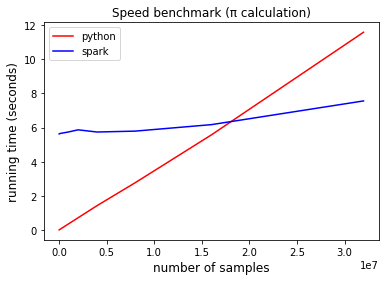

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(steps, python_times, color='red', label='python')
plt.plot(steps, sparks_times, color='blue', label='spark')
plt.legend()
plt.xlabel('number of samples', fontsize=12)
plt.ylabel('running time (seconds)', fontsize=12)
plt.title('Speed benchmark (π calculation)')
plt.show()

__Question__: How does Spark run faster than (Pandas/Python) even on a single computer? What does the slope of the blue line in the generated plot tell you?

__Answer__: Spark runs the code on multiple threads.
From the generated plot, Spark is not beneficial for smaller data samples. However, it scales very well and gains a significant advantage on bigger data sets.

__Hint__: If you pick a big enough value for the `num_samples` parameter (code below), you should be able to see multiple python processes running at the same time in your (system monitor/task manager) when benchmarking spark code (A).

In [15]:
# code (A) Spark 
# Depending on your hardware, this can take some time to fininsh.
# You can reduce num_samples if it is taking too much time.

num_samples = 1000000000
spark_pi_calc()

3.141588996

In [16]:
# code (B) Python - List Comprehension
# Depending on your hardware, this can take some time to fininsh.
# You can reduce num_samples if it is taking too much time.

num_samples = 100000000
python_pi_calc()

3.14141724

<br>
<br>
<img src="files/spark run.png">

<br>
<br>
This picture also demonstrates how Spark uses CPU VS python:
<br>
<br>

<img src="files/spark cpu load.png">

<a id="rdd"></a>
## 3. Work with Resilient Distributed Datasets
Spark uses an abstraction for working with data called a Resilient Distributed Dataset (RDD). An RDD is a collection of elements that can be operated on in parallel. RDDs are immutable, so you can't update the data in them. To update data in an RDD, you must create a new RDD. In Spark, all work is done by creating new RDDs, transforming existing RDDs, or using RDDs to compute results. When working with RDDs, the Spark driver application automatically distributes the work across the cluster.

You can construct RDDs by parallelizing existing Python collections (lists), by manipulating RDDs, or by manipulating files in HDFS or any other storage system.

You can run these types of methods on RDDs: 
 - Actions: query the data and return values
 - Transformations: manipulate data values and return pointers to new RDDs. 

Find more information on Python methods in the <a href="http://spark.apache.org/docs/latest/api/python/pyspark.html" target="_blank" rel="noopener noreferrer">PySpark documentation</a>.

<a id="rdd1"></a>
### 3.1 Create a collection
Create a Python collection of the numbers 1 - 10:

In [17]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

<a id="rdd2"></a>
### 3.2 Create an RDD 
Put the collection into an RDD named `x_nbr_rdd` using the `parallelize` method:

In [18]:
x_nbr_rdd = spark.sparkContext.parallelize(x)

Notice that there's no return value. The `parallelize` method didn't compute a result, which means it's a transformation. Spark just recorded how to create the RDD.

<a id="rdd3"></a>
### 3.3 View the data 
View the first element in the RDD:

In [19]:
x_nbr_rdd.first()

1

Each number in the collection is in a different element in the RDD. Because the `first()` method returned a value, it is an action. 

Now view the first five elements in the RDD:

In [20]:
x_nbr_rdd.take(5)

[1, 2, 3, 4, 5]

<a id="rdd4"></a>
### 3.4 Create another RDD 
Create a Python collection that contains strings:

In [21]:
y = ["Hello Human", "My Name is Spark"]

Put the collection into an RDD:

In [22]:
y_str_rdd = spark.sparkContext.parallelize(y)

View the first element in the RDD:

In [23]:
y_str_rdd.take(1)

['Hello Human']

You created the string "Hello Human" and you returned it as the first element of the RDD. To analyze a set of words, you can map each word into an RDD element.

<a id="trans"></a>
## 4. Manipulate data in RDDs

Remember that to manipulate data, you use transformation functions.

Here are some common Python transformation functions that you'll be using in this notebook:

 - `map(func)`: returns a new RDD with the results of running the specified function on each element  
 - `filter(func)`: returns a new RDD with the elements for which the specified function returns true   
 - `distinct([numTasks]))`: returns a new RDD that contains the distinct elements of the source RDD
 - `flatMap(func)`: returns a new RDD by first running the specified function on all elements, returning 0 or more results for each original element, and then flattening the results into individual elements

You can also create functions that run a single expression and don't have a name with the Python `lambda` keyword. For example, this function returns the sum of its arguments: `lambda a , b : a + b`.

<a id="trans1"></a>
### 4.1 Update numeric values
Run the `map()` function with the `lambda` keyword to replace each element, X, in your first RDD (the one that has numeric values) with X+1. Because RDDs are immutable, you need to specify a new RDD name.

In [24]:
# TODO: Replace <FILL IN> with appropriate code

x_nbr_rdd_2 = x_nbr_rdd.map(lambda x: x+1)

Now look at the elements of the new RDD: 

In [25]:
x_nbr_rdd_2.collect()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Be careful with the `collect` method! It returns __all__ elements of the RDD to the driver. Returning a large data set might be not be very useful. No-one wants to scroll through a million rows!

<a id="trans2"></a>
### 4.2 Add numbers in an array
An array of values is a common data format where multiple values are contained in one element. You can manipulate the individual values if you split them up into separate elements.

Create an array of numbers by including quotation marks around the whole set of numbers. If you omit the quotation marks, you get a collection of numbers instead of an array.

In [26]:
X = ["1,2,3,4,5,6,7,8,9,10"]

Create an RDD for the array:

In [27]:
y_rd = spark.sparkContext.parallelize(X)

Split the values at commas and add values in the positions 3 and 7 in the array. Keep in mind that an array starts with position 0. Use a backslash character, \, to break the line of code for clarity.

In [28]:
# TODO: Replace <FILL IN> with appropriate code

Sum_rd = y_rd.map(lambda y: y.split(',')).map(lambda y: int(y[3]) + int(y[7]))

Now return the value of the sum:

In [29]:
Sum_rd.first()

12

You should get `12`.

<a id="trans3"></a>
### 4.3 Split and count text strings

Create an RDD with a text string and show the first element:

In [30]:
Words = ["Hello Human. I'm Spark and I love running analysis on data."]
words_rd = spark.sparkContext.parallelize(Words)
words_rd.first()

"Hello Human. I'm Spark and I love running analysis on data."

Split the string into separate lines at the space characters and look at the first element:

In [31]:
# TODO: Replace <FILL IN> with appropriate code

Words_rd2 = words_rd.map(lambda line: line.split(' '))
Words_rd2.first()

['Hello',
 'Human.',
 "I'm",
 'Spark',
 'and',
 'I',
 'love',
 'running',
 'analysis',
 'on',
 'data.']

Count the number of elements in this RDD with the `count()` method:

In [32]:
Words_rd2.count()

1

You should get `1`.

Of course, you already knew that there was only one element because you ran the `first()` method and it returned the whole string. Splitting the string into multiple lines did not create multiple elements.

Now split the string again, but this time with the `flatmap()` method, and look at the first three elements:

In [33]:
# TODO: Replace <FILL IN> with appropriate code

words_rd2 = words_rd.flatMap(lambda line: line.split(' '))
words_rd2.take(3)

['Hello', 'Human.', "I'm"]

In [34]:
words_rd2.count()

11

You should get `11`.
This time each word is separated into its own element.

<a id="trans4"></a>
### 4.4 Count words with a pair RDD
A common way to count the number of instances of words in an RDD is to create a pair RDD. A pair RDD converts each word into a key-value pair: the word is the key and the number 1 is the value. Because the values are all 1, when you add the  values for a particular word, you get the number of instances of that word.

Create an RDD:

In [35]:
z = ["First,Line", "Second,Line", "and,Third,Line"]
z_str_rdd = spark.sparkContext.parallelize(z)
z_str_rdd.first()

'First,Line'

Split the elements into individual words with the `flatmap()` method:

In [36]:
z_str_rdd_split_flatmap = z_str_rdd.flatMap(lambda line: line.split(","))
z_str_rdd_split_flatmap.collect()

['First', 'Line', 'Second', 'Line', 'and', 'Third', 'Line']

Convert the elements into key-value pairs:

In [37]:
countWords = z_str_rdd_split_flatmap.map(lambda word:(word,1))
countWords.collect()

[('First', 1),
 ('Line', 1),
 ('Second', 1),
 ('Line', 1),
 ('and', 1),
 ('Third', 1),
 ('Line', 1)]

Now sum all the values by key to find the number of instances for each word: 

In [38]:
from operator import add
countWords2 = countWords.reduceByKey(add)
countWords2.collect()

[('and', 1), ('Third', 1), ('Second', 1), ('First', 1), ('Line', 3)]

Notice that the word `Line` has a count of 3.

<a id="filter"></a>
## 5. Filter data

The filter command creates a new RDD from another RDD based on a filter criteria.
The filter syntax is: 

`.filter(lambda line: "Filter Criteria Value" in line)`

Hint: Use a simple python `print` command to add a string to your Spark results and to run multiple actions in single cell.

Find the number of instances of the word `Line` in the `z_str_rdd_split_flatmap` RDD:

In [39]:
# TODO: Replace <FILL IN> with appropriate code

words_rd3 = z_str_rdd_split_flatmap.filter(lambda line: 'Line' in line) 

print ("The count of words " + str(words_rd3.first()))
print ("Is: " + str(words_rd3.count()))

The count of words Line
Is: 3


You should get `3`.

<a id="wordfile"></a>
## 6. Analyze text data from a file
In this section, you'll use a text file `README.txt` to create an RDD from it, and analyze the text in it. The file should already exist on `files`folder next to this notebook.

<a id="wordfile2"></a>
### 6.2 Create an RDD from the file
Use the `textFile` method to create an RDD named `textfile_rdd` based on the `README.txt` file. The RDD will contain one element for each line in the `README.txt` file.
Also, count the number of lines in the RDD, which is the same as the number of lines in the text file. 

In [40]:
textfile_rdd = spark.sparkContext.textFile("files/README.txt")
textfile_rdd.count()

98

<a id="wordfile3"></a>
### 6.3 Filter for a word 
Filter the RDD to keep only the elements that contain the word "Spark" with the `filter` transformation:

In [41]:
# TODO: Replace <FILL IN> with appropriate code

Spark_lines = textfile_rdd.filter(lambda line: "Spark" in line)
Spark_lines.first()

'# Apache Spark'

You should see `'# Apache Spark'`

Count the number of elements in this filtered RDD and present the result as a concatenated string:

In [42]:
# TODO: Replace <FILL IN> with appropriate code

print ("The file README.txt has " + str(Spark_lines.count()) + \
" of " + str(textfile_rdd.count()) + \
" Lines with word Spark in it.")

The file README.txt has 19 of 98 Lines with word Spark in it.


You should see `The file README.txt has 19 of 98 Lines with word Spark in it.`

<a id="wordfile4"></a>
### 6.4 Count the instances of a string at the beginning of words
Count the number of times the substring "Spark" appears at the beginning of a word in the original text.

Here's what you need to do: 

1. Run a `flatMap` transformation on the Spark_lines RDD and split on white spaces.
2. Create an RDD with key-value pairs where the first element of the tuple is the word and the second element is the number 1.
3. Run a `reduceByKey` method with the `add` function to count the number of instances of each word.<br>
4. Filter the resulting RDD to keep only the elements that start with the word "Spark". In Python, the syntax to determine whether a string starts with a token is: `string.startswith("token")` 
5. Display the resulting list of elements that start with "Spark".

In [43]:
spark_lines_rdd = Spark_lines.flatMap(lambda word: word.split(" "))
value_pairs = spark_lines_rdd.map(lambda word: (word,1))
reduced_by_key = value_pairs.reduceByKey(add)
starts_with_spark = reduced_by_key.filter(lambda line: line[0].startswith("Spark"))
starts_with_spark.collect()

[('Spark', 14),
 ('Spark"](http://spark.apache.org/docs/latest/building-spark.html).', 1),
 ('SparkPi', 2),
 ('Spark](#building-spark).', 1),
 ('Spark.', 1)]

You should see:<br>
<pre>
[('Spark', 14),
 ('Spark"](http://spark.apache.org/docs/latest/building-spark.html).', 1),
 ('SparkPi', 2),
 ('Spark](#building-spark).', 1),
 ('Spark.', 1)]
</pre>

<a id="wordfile5"></a>
### 6.5 Count instances of a string within words
Now filter and display the elements that contain the substring "Spark" anywhere in the word, instead of just at the beginning of words like the last section. Your result should be a superset of the previous result.

The Python syntax to determine whether a string contains a particular token is: `"token" in string`

In [44]:
contains_spark = reduced_by_key.filter(lambda line: "Spark" in line[0])
contains_spark.collect()

[('Spark', 14),
 ('Spark"](http://spark.apache.org/docs/latest/building-spark.html).', 1),
 ('SparkPi', 2),
 ('Spark](#building-spark).', 1),
 ('Spark.', 1),
 ('tests](https://cwiki.apache.org/confluence/display/SPARK/Contributing+to+Spark#ContributingtoSpark-AutomatedTesting).',
  1)]

You should see:
<pre>
[('Spark', 14),
 ('Spark"](http://spark.apache.org/docs/latest/building-spark.html).', 1),
 ('SparkPi', 2),
 ('Spark](#building-spark).', 1),
 ('Spark.', 1),
 ('tests](https://cwiki.apache.org/confluence/display/SPARK/Contributing+to+Spark#ContributingtoSpark-AutomatedTesting).',
  1)]
</pre>

<a id="numfile"></a>
## 7. Analyze numeric data from a file
You'll analyze a sample file `Scores.txt` given in `files` folder that contains instructor names and scores. The file has the following format: Instructor Name,Score1,Score2,Score3,Score4,... The number of scores for each instructor could be diferent.
Here is an example line from the text file: "Carlo,5.5,3,3,4" or "Pablo,9,10,8.6,7,9,5,6"
Your task is to look at all the scores from each instructor and find the maximum score given by each instructor:

1. Load the text file into an RDD.
1. Run a transformation to create an RDD with the instructor names and the scores per instructor.
1. Run a second transformation to compute the maximum score for each instructor.
1. Display the results.

In [45]:
instructors_file = spark.sparkContext.textFile("files/Scores.txt")
instructor_scores = instructors_file.flatMap(lambda line: line.split('"')) \
                                    .map(lambda line: (line.split(",",1)[0], \
                                                           line.split(",",1)[1]))

instructor_max_score = instructor_scores.map(lambda line: (line[0], \
                                                           max([float(string) for string in line[1].split(',')])))
instructor_max_score.collect()

[('Tobias', 8.0),
 ('Malin', 10.0),
 ('Ali', 8.7),
 ('Magnus', 5.0),
 ('Alice', 9.1),
 ('Jack', 7.4)]

You should see:
<pre>
[('Tobias', 8.0),
 ('Malin', 10.0),
 ('Ali', 8.7),
 ('Magnus', 5.0),
 ('Alice', 9.1),
 ('Jack', 7.4)]
</pre>

## 8. PageRank Algorithm

In the final task, we are interested in using Spark to rank a list of websites based on their importance. One obvious application of such an analysis is to provide the ordering for web searches. To measure the importance of a page, you are tasked to calculate `PageRank`. PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites. The PageRank algorithm is very well described in Chapter 5 of the book `Mining Massive Data Sets`. You can access the book through [this link](http://www.mmds.org/).

The websites are stored in a file named `urls.txt` located in the `files` folder. The input file has the following format:

<pre>
URL, neighbor URL
URL, neighbor URL
URL, neighbor URL
...
</pre>


In the output, sort the websites descending based on their level of importance.

In [46]:
#from pyspark.mllib.linalg import Vectors, Matrices
#from pyspark.mllib.linalg.distributed import RowMatrix, IndexedRowMatrix, IndexedRow
#from pyspark.sql.functions import lit
websites_file = spark.sparkContext.textFile("files/urls_link.txt")

# Seperate a URL and its neighbor URL into tuples.
websites_map = websites_file.map(lambda line: (line.split(",")[0], line.split(",")[1]))

# Seperate every URL with their neighbor URLs.
unique_websites_neighbors = websites_map.reduceByKey(add)

# Map each URL with all their neighbor URLs
mapped_neighbors = unique_websites_neighbors.map(lambda site: (site[0], site[1].split(" ")[1:]))

# Calculates number of times the URL has been mentioned overall.
n_neighbors = mapped_neighbors.flatMap(lambda site: site[1]).map(lambda neighbor: (neighbor, 1)).reduceByKey(add)

# Calculate PageRank by dividing by the number of unique URLs.
temp_rank = n_neighbors.map(lambda site: (site[0], site[1]/19))

for index, site in enumerate(temp_rank.collect(), 1):
    print(f'{index}) {site[0]} PageRank: {site[1]}')

1) google.com PageRank: 2.789473684210526
2) wikipedia.org PageRank: 8.736842105263158
3) twitter.com PageRank: 2.210526315789474
4) yelp.com PageRank: 0.47368421052631576
5) apple.com PageRank: 0.7368421052631579
6) hh.se PageRank: 0.3157894736842105
7) imdb.com PageRank: 0.9473684210526315
8) blocket.se PageRank: 0.2631578947368421
9) halmstad.se PageRank: 0.10526315789473684
10) instagram.com PageRank: 0.47368421052631576
11) urbandictionary.com PageRank: 0.2631578947368421
12) merriam-webster.com PageRank: 1.105263157894737
13) visithalland.com PageRank: 0.05263157894736842
14) tripadvisor.com PageRank: 0.5789473684210527
15) youtube.com PageRank: 3.1578947368421053
16) wiktionary.org PageRank: 0.5789473684210527
17) amazon.com PageRank: 1.4736842105263157
18) facebook.com PageRank: 1.4210526315789473
19) fandom.com PageRank: 0.631578947368421


The `PageRank` algorithm has some variants. Based on how you implement the algorithm and what parameters you choose, you will end up geting different scores and ranks. Following is one example output:

<pre>
1) google.com PageRank:1.8086487117025336
2) wikipedia.org PageRank:1.8086487117025336
3) facebook.com PageRank:1.777648228912891
4) youtube.com PageRank:1.7021245199883723
5) twitter.com PageRank:1.5510244219266531
6) amazon.com PageRank:1.3904212544003804
7) imdb.com PageRank:1.3008511398069642
8) merriam-webster.com PageRank:1.1146111418335307
9) fandom.com PageRank:1.002580594391505
10) tripadvisor.com PageRank:0.9650177901770668
11) apple.com PageRank:0.889833856208652
12) urbandictionary.com PageRank:0.783325788483356
13) wiktionary.org PageRank:0.7344188304535614
14) instagram.com PageRank:0.488708566583417
15) blocket.se PageRank:0.4475515972949302
16) yelp.com PageRank:0.40433532158209406
17) hh.se PageRank:0.3986772304305001
18) visithalland.com PageRank:0.2340398586683635
19) halmstad.se PageRank:0.19753243545269022
</pre>

<div class="alert alert-block alert-danger">

__IMPORTANT__ 

Please complete this Jupyter Notebook file and send it to mahmoud.rahat@hh.se within __two weeks__ after this lab session. Make sure that you include "__Big Data Parallel Programming 2020__" in your email title and write the name of the lab in the title of your email, e.g., Lab1 (do not put space between Lab and its number). __Change the name of your notebook file__ to include the `course title`, `lab title`, `first and last names` of you and your group mates, if any, e.g., "`BDPP_Lab1_NameSurname_NameSurname.ipynb`".

</div>